In [43]:
# A. Collecte des données

## 1. Source du Corpus
import requests
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, roc_curve, auc
import nltk
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
import re

# Installation des dépendances NLTK
nltk.download('punkt')
nltk.download('stopwords')
nltk.download('wordnet')


[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\DJIBINDIAYE\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\DJIBINDIAYE\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\DJIBINDIAYE\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


True

2. Description des données (format, taille, etc.)

In [44]:
class DataDownloader:
    def __init__(self, url, local_filename):
        self.url = url
        self.local_filename = local_filename

    def download_data(self):
        response = requests.get(self.url)
        if response.status_code == 200:
            with open(self.local_filename, 'wb') as file:
                file.write(response.content)
            print(f"Les données ont été téléchargées avec succès dans le fichier {self.local_filename}.")
        else:
            print(f"Échec du téléchargement. Statut de la requête : {response.status_code}")

# Utilisation des classes
url = "https://www.usna.edu/Users/cs/nchamber/data/twitter/general%20tweets.txt"
local_filename = "general_tweets.txt"

# Télécharger les données
print("------------ Télécharger les données ---------------")
downloader = DataDownloader(url, local_filename)
downloader.download_data()


------------ Télécharger les données ---------------
Les données ont été téléchargées avec succès dans le fichier general_tweets.txt.


----------Explorer les données----------------
  Label                                               Text
0   NOT  Bumping dj sefs mixtape nowww this is my music...
1   NOT  #ieroween THE STORY OF IEROWEEN! THE VIDEO ->>...
2   NOT  trick or treating at the mall today; ZOO! last...
3   NOT  @Ussk81 PMSL!!! I try not to stare but I can't...
4   NOT  @Sc0rpi0n676 btw - is there a remote chance i ...
----------Distribution des classes----------------
Distribution des classes :
 Label
NOT      1972
POLIT      28
Name: count, dtype: int64
----------Répartition de la longueur des tweets----------------


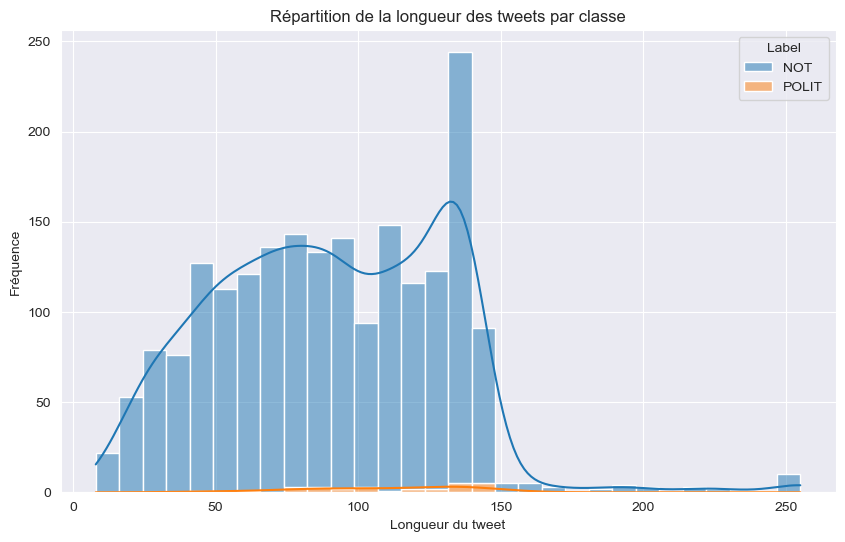

In [45]:
class DataExplorer:
    def __init__(self, filename):
        self.filename = filename
        self.df = None  # Ajoutez une variable pour stocker le DataFrame exploré

    def explore_data(self):
        # Charger les données dans un DataFrame
        self.df = pd.read_csv(self.filename, delimiter='\t', header=None, names=['Label', 'Text'])

        # Afficher les premières lignes du DataFrame pour comprendre la structure des données
        print(self.df.head())

        # Distribution des classes
        print("----------Distribution des classes----------------")
        class_distribution = self.df['Label'].value_counts()
        print("Distribution des classes :\n", class_distribution)

        # Longueur des tweets
        self.df['Tweet_Length'] = self.df['Text'].apply(len)

        # Répartition de la longueur des tweets
        print("----------Répartition de la longueur des tweets----------------")
        plt.figure(figsize=(10, 6))
        sns.histplot(self.df, x='Tweet_Length', hue='Label', bins=30, kde=True, multiple="stack")
        plt.title('Répartition de la longueur des tweets par classe')
        plt.xlabel('Longueur du tweet')
        plt.ylabel('Fréquence')
        plt.show()

    def get_explored_data(self):
        # Renvoie le DataFrame exploré
        return self.df

# Explorer les données
print("----------Explorer les données----------------")
explorer = DataExplorer(filename=local_filename)
explorer.explore_data()
explored_data = explorer.get_explored_data().copy()


In [100]:
class DataPreprocessor:
    def __init__(self, filename):
        self.filename = filename

    def preprocess_data(self):
        # Charger les données dans un DataFrame
        df = pd.read_csv(self.filename, delimiter='\t', header=None, names=['Label', 'Text'])

        # Nettoyage des tweets
        df['Cleaned_Text'] = df['Text'].apply(self.clean_tweet)

        # Tokenisation des tweets
        df['Tokenized_Text'] = df['Cleaned_Text'].apply(self.tokenize_text)

        # Réduction des mots à leur forme de base (utilisation de la lemmatisation)
        df['Lemmatized_Text'] = df['Tokenized_Text'].apply(self.lemmatize_text)

        return df[['Text', 'Label', 'Cleaned_Text', 'Tokenized_Text', 'Lemmatized_Text']]

    def clean_tweet(self, text):
        # Supprimer les mentions
        text = re.sub(r'@[A-Za-z0-9]+', '', text)
        # Supprimer les liens
        text = re.sub('https?://[A-Za-z0-9./]+', '', text)
        # Supprimer la ponctuation et les caractères spéciaux
        text = re.sub(r'[^a-zA-Z\s]', '', text)
        # Convertir le texte en minuscules
        text = text.lower()
        return text

    def tokenize_text(self, text):
        # Tokenisation des tweets en mots
        tokens = word_tokenize(text)
        return tokens

    def lemmatize_text(self, tokens):
        # Réduction des mots à leur forme de base (utilisation de la lemmatisation)
        lemmatizer = WordNetLemmatizer()
        lemmatized_tokens = [lemmatizer.lemmatize(token) for token in tokens]
        return lemmatized_tokens

# Télécharger les données nécessaires pour NLTK
nltk.download('punkt')
nltk.download('wordnet')

# Prétraitement des données
print("------------ Prétraitement des données ---------------")
preprocessor = DataPreprocessor(filename=local_filename)
preprocessed_data = preprocessor.preprocess_data()

# Afficher les premières lignes du DataFrame résultant
print(preprocessed_data.head())

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\DJIBINDIAYE\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\DJIBINDIAYE\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


------------ Prétraitement des données ---------------
                                                Text Label  \
0  Bumping dj sefs mixtape nowww this is my music...   NOT   
1  #ieroween THE STORY OF IEROWEEN! THE VIDEO ->>...   NOT   
2  trick or treating at the mall today; ZOO! last...   NOT   
3  @Ussk81 PMSL!!! I try not to stare but I can't...   NOT   
4  @Sc0rpi0n676 btw - is there a remote chance i ...   NOT   

                                        Cleaned_Text  \
0  bumping dj sefs mixtape nowww this is my music...   
1  ieroween the story of ieroween the video    ju...   
2  trick or treating at the mall today zoo last y...   
3   pmsl i try not to stare but i cant help it li...   
4   btw  is there a remote chance i will see you ...   

                                      Tokenized_Text  \
0  [bumping, dj, sefs, mixtape, nowww, this, is, ...   
1  [ieroween, the, story, of, ieroween, the, vide...   
2  [trick, or, treating, at, the, mall, today, zo...   
3  [pmsl, i

In [141]:
# B. Représentation du texte

## 1. Utilisation TF-IDF pour la représentation numérique

class TextRepresentation:
    def __init__(self, df):
        self.df = df
        self.vectorizer = None  # Ajoutez cette ligne pour initialiser l'attribut vectorizer

    def tfidf_representation(self):
        # Séparation des données en ensembles d'entraînement et de test
        X_train, X_test, y_train, y_test = train_test_split(self.df['Lemmatized_Text'].apply(' '.join),
                                                            self.df['Label'], test_size=0.2, random_state=42)

        # Création d'un vecteur TF-IDF
        self.vectorizer = TfidfVectorizer()  # Vous pouvez ajuster le nombre maximal de fonctionnalités
        X_train_tfidf = self.vectorizer.fit_transform(X_train)
        X_test_tfidf = self.vectorizer.transform(X_test)

        return X_train_tfidf, X_test_tfidf, y_train, y_test


# Utilisation de la classe TextRepresentation
representation = TextRepresentation(df=preprocessed_data)
X_train_tfidf, X_test_tfidf, y_train, y_test = representation.tfidf_representation()


In [142]:
# Utilisation de la classe DataSplitter
class DataSplitter:
    def __init__(self, X, y):
        self.X = X
        self.y = y

    def split_data(self):
        # Division des données en ensembles d'entraînement, de validation et de test
        X_train, X_temp, y_train, y_temp = train_test_split(self.X, self.y, test_size=0.2, random_state=42)
        X_val, X_test, y_val, y_test = train_test_split(X_temp, y_temp, test_size=0.5, random_state=42)

        return X_train, X_val, X_test, y_train, y_val, y_test


# Utilisation de la classe DataSplitter
splitter = DataSplitter(X=X_train_tfidf, y=y_train)
X_train, X_val, X_test, y_train, y_val, y_test = splitter.split_data()

# Afficher la forme des ensembles
print("Shape of X_train:", X_train.shape)
print("Shape of X_val:", X_val.shape)
print("Shape of X_test:", X_test.shape)

# Création d'un DataFrame pour l'ensemble d'entraînement
train_df = pd.DataFrame(X_train.toarray(), columns=representation.vectorizer.get_feature_names_out())
train_df['Label'] = y_train

# Afficher les premières lignes du DataFrame d'entraînement
print("DataFrame d'entraînement:")
print(train_df.head())

# Création d'un DataFrame pour l'ensemble de test
test_df = pd.DataFrame(X_test.toarray(), columns=representation.vectorizer.get_feature_names_out())
test_df['Label'] = y_test

# Afficher les premières lignes du DataFrame de test
print("\nDataFrame de test:")
print(test_df.head())


Shape of X_train: (1280, 5714)
Shape of X_val: (160, 5714)
Shape of X_test: (160, 5714)
DataFrame d'entraînement:
   aaaaaahhhhhhh  aaaah  aahh  aan  aaron   ab  abandoned  abba  abis  able  \
0            0.0    0.0   0.0  0.0    0.0  0.0        0.0   0.0   0.0   0.0   
1            0.0    0.0   0.0  0.0    0.0  0.0        0.0   0.0   0.0   0.0   
2            0.0    0.0   0.0  0.0    0.0  0.0        0.0   0.0   0.0   0.0   
3            0.0    0.0   0.0  0.0    0.0  0.0        0.0   0.0   0.0   0.0   
4            0.0    0.0   0.0  0.0    0.0  0.0        0.0   0.0   0.0   0.0   

   ...  zijn  zina  zombie  zombifiedhalloween  zona  zone  zoo  zoough  \
0  ...   0.0   0.0     0.0                 0.0   0.0   0.0  0.0     0.0   
1  ...   0.0   0.0     0.0                 0.0   0.0   0.0  0.0     0.0   
2  ...   0.0   0.0     0.0                 0.0   0.0   0.0  0.0     0.0   
3  ...   0.0   0.0     0.0                 0.0   0.0   0.0  0.0     0.0   
4  ...   0.0   0.0     0.0          

In [124]:
# C. Modélisation

## 1. Sélection du modèle de classification (Naive Bayes)

class TextClassifier:
    def __init__(self, X_train, X_validation, X_test, y_train, y_validation, y_test):
        self.X_train = X_train
        self.X_validation = X_validation
        self.X_test = X_test
        self.y_train = y_train
        self.y_validation = y_validation
        self.y_test = y_test
        self.classifier = MultinomialNB()

    def train_classifier(self, X, y):
        # Entraîner le classificateur sur les données d'entraînement
        self.classifier.fit(X, y)

    def evaluate_classifier(self, X, y, set_name):
        # Prédire les labels sur les données
        y_pred = self.classifier.predict(X)

        # Évaluer la performance du modèle
        accuracy = accuracy_score(y, y_pred)
        print(f"Précision sur l'ensemble {set_name}: {accuracy:.4f}\n")

        # Afficher le rapport de classification
        print(f"Rapport de classification sur l'ensemble {set_name}:\n")
        print(classification_report(y, y_pred))

        # Afficher la matrice de confusion
        print(f"Matrice de confusion sur l'ensemble {set_name}:\n")
        print(confusion_matrix(y, y_pred))

        # Visualiser la matrice de confusion avec seaborn
        plt.figure(figsize=(8, 6))
        sns.heatmap(confusion_matrix(y, y_pred), annot=True, fmt='d', cmap='Blues', xticklabels=sorted(set(y)),
                    yticklabels=sorted(set(y)))
        plt.title(f"Matrice de confusion sur l'ensemble {set_name}")
        plt.xlabel('Prédiction')
        plt.ylabel('Vraie valeur')
        plt.show()

    def classify(self, tweet):
        # Prétraitement du tweet (nettoyage, lemmatisation, etc.) si nécessaire

        # Utilisez le modèle pour classer le tweet
        tweet_tfidf = self.vectorizer.transform([tweet])
        prediction = self.classifier.predict(tweet_tfidf)

        # Retournez le résultat de la classification
        return prediction[0]


# Utilisation de la classe TextClassifier pour entraîner le modèle
classifier = TextClassifier(X_train_tfidf, X_val, X_test_tfidf, y_train, y_val, y_test)
classifier.train_classifier(X_train, y_train)

# Évaluer le classificateur sur l'ensemble de test
classifier.evaluate_classifier(X_test, y_test, "de test")


ValueError: Found input variables with inconsistent numbers of samples: [1280, 1600]

Précision sur l'ensemble de test: 0.9850

Rapport de classification sur l'ensemble de test:

              precision    recall  f1-score   support

         NOT       0.98      1.00      0.99       394
       POLIT       0.00      0.00      0.00         6

    accuracy                           0.98       400
   macro avg       0.49      0.50      0.50       400
weighted avg       0.97      0.98      0.98       400

Matrice de confusion sur l'ensemble de test:

[[394   0]
 [  6   0]]


C:\Users\DJIBINDIAYE\.conda\envs\TPE_DataMining\lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\DJIBINDIAYE\.conda\envs\TPE_DataMining\lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\DJIBINDIAYE\.conda\envs\TPE_DataMining\lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start,

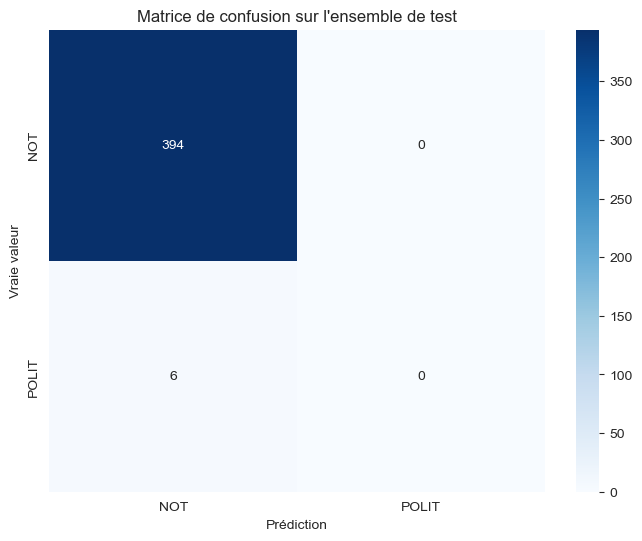

Classification du tweet : NOT


In [117]:
# C. Modélisation

## 1. Sélection du modèle de classification (Naive Bayes)

class TextClassifier:
    def __init__(self, X_train, X_validation, X_test, y_train, y_validation, y_test, vectorizer):
        self.X_train = X_train
        self.X_validation = X_validation
        self.X_test = X_test
        self.y_train = y_train
        self.y_validation = y_validation
        self.y_test = y_test
        self.classifier = MultinomialNB()
        self.preprocessor = preprocessor
        self.vectorizer = vectorizer  # Utilisez le vectorizer fourni en argument

    def train_classifier(self, X, y):
        # Entraîner le classificateur sur les données d'entraînement
        self.classifier.fit(X, y)

    def evaluate_classifier(self, X, y, set_name):
        # Prédire les labels sur les données
        y_pred = self.classifier.predict(X)

        # Évaluer la performance du modèle
        accuracy = accuracy_score(y, y_pred)
        print(f"Précision sur l'ensemble {set_name}: {accuracy:.4f}\n")

        # Afficher le rapport de classification
        print(f"Rapport de classification sur l'ensemble {set_name}:\n")
        print(classification_report(y, y_pred))

        # Afficher la matrice de confusion
        print(f"Matrice de confusion sur l'ensemble {set_name}:\n")
        print(confusion_matrix(y, y_pred))

        # Visualiser la matrice de confusion avec seaborn
        plt.figure(figsize=(8, 6))
        sns.heatmap(confusion_matrix(y, y_pred), annot=True, fmt='d', cmap='Blues', xticklabels=sorted(set(y)),
                    yticklabels=sorted(set(y)))
        plt.title(f"Matrice de confusion sur l'ensemble {set_name}")
        plt.xlabel('Prédiction')
        plt.ylabel('Vraie valeur')
        plt.show()

    def classify(self, tweet):
        # Utilisez le modèle pour classer le tweet
        tweet = self.preprocessor.clean_tweet(tweet)
        tweet = self.preprocessor.tokenize_text(tweet)
        tweet = self.preprocessor.lemmatize_text(tweet)
        preprocessed_tweet = ' '.join(tweet)
        preprocessed_tweet = str(preprocessed_tweet).lower()

        tweet_tfidf = self.vectorizer.transform([preprocessed_tweet])
        prediction = self.classifier.predict(tweet_tfidf)

        # Retournez le résultat de la classification
        return prediction[0]


# Utilisation de la classe TextClassifier pour entraîner le modèle
classifier = TextClassifier(X_train_tfidf, X_val, X_test_tfidf, y_train, y_val, y_test, representation.vectorizer)
classifier.train_classifier(X_train_tfidf, y_train)

# Évaluer le classificateur sur l'ensemble de test
classifier.evaluate_classifier(X_test_tfidf, y_test, "de test")

# Classer un tweet
tweet = "@RajeevMasand I like to ask challenging and unique q's ones that can them thinking about the diaspora. Please tweet if KJo comes on..A MUST!"
classification_result = classifier.classify(tweet)

print(f"Classification du tweet : {classification_result}")


best_classifier : MultinomialNB(alpha=0.5)
Meilleure valeur d'alpha : 0.5
Précision sur l'ensemble de test: 0.9812

Rapport de classification sur l'ensemble de test:

              precision    recall  f1-score   support

         NOT       0.98      1.00      0.99       157
       POLIT       0.00      0.00      0.00         3

    accuracy                           0.98       160
   macro avg       0.49      0.50      0.50       160
weighted avg       0.96      0.98      0.97       160

Matrice de confusion sur l'ensemble de test:

[[157   0]
 [  3   0]]


C:\Users\DJIBINDIAYE\.conda\envs\TPE_DataMining\lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\DJIBINDIAYE\.conda\envs\TPE_DataMining\lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\DJIBINDIAYE\.conda\envs\TPE_DataMining\lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start,

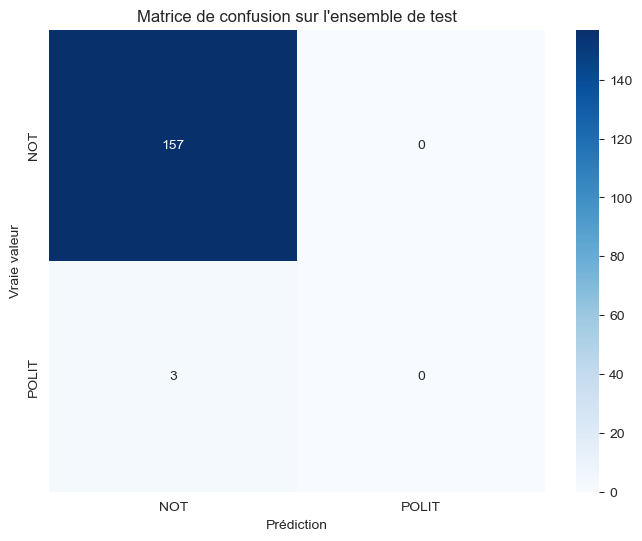

Classification du tweet : NOT


In [150]:
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.naive_bayes import MultinomialNB
import seaborn as sns
import matplotlib.pyplot as plt

class TextClassifier:
    def __init__(self, X_train, X_validation, X_test, y_train, y_validation, y_test, vectorizer):
        self.X_train = X_train
        self.X_validation = X_validation
        self.X_test = X_test
        self.y_train = y_train
        self.y_validation = y_validation
        self.y_test = y_test
        self.classifier = None
        self.preprocessor = preprocessor
        self.vectorizer = vectorizer  # Utilisez le vectorizer fourni en argument

    def train_classifier(self, X, y):
        # Définir les valeurs d'alpha que vous souhaitez essayer
        alphas = [0.1, 0.5, 1.0, 1.5, 2.0]

        # Créer une grille de recherche
        param_grid = {'alpha': alphas}
        grid_search = GridSearchCV(MultinomialNB(), param_grid, cv=5, scoring='accuracy')

        # Exécuter la recherche par grille sur les données d'entraînement
        grid_search.fit(X, y)

        # Obtenir le meilleur modèle après la recherche par grille
        best_classifier = grid_search.best_estimator_

        # Entraîner le modèle sur l'ensemble complet d'entraînement avec la meilleure valeur d'alpha
        best_classifier.fit(X, y)

        # Enregistrer le meilleur classificateur dans votre classe pour une utilisation ultérieure
        self.classifier = best_classifier
        print("best_classifier :", best_classifier)

        # Afficher la meilleure valeur d'alpha
        print(f"Meilleure valeur d'alpha : {grid_search.best_params_['alpha']}")

    def evaluate_classifier(self, X, y, set_name):
        if self.classifier is None:
            raise ValueError("Le classificateur n'a pas été entraîné. Utilisez train_classifier avant l'évaluation.")

        # Prédire les labels sur les données
        y_pred = self.classifier.predict(X)

        # Évaluer la performance du modèle
        accuracy = accuracy_score(y, y_pred)
        print(f"Précision sur l'ensemble {set_name}: {accuracy:.4f}\n")

        # Afficher le rapport de classification
        print(f"Rapport de classification sur l'ensemble {set_name}:\n")
        print(classification_report(y, y_pred))

        # Afficher la matrice de confusion
        print(f"Matrice de confusion sur l'ensemble {set_name}:\n")
        print(confusion_matrix(y, y_pred))

        # Visualiser la matrice de confusion avec seaborn
        plt.figure(figsize=(8, 6))
        sns.heatmap(confusion_matrix(y, y_pred), annot=True, fmt='d', cmap='Blues', xticklabels=sorted(set(y)),
                    yticklabels=sorted(set(y)))
        plt.title(f"Matrice de confusion sur l'ensemble {set_name}")
        plt.xlabel('Prédiction')
        plt.ylabel('Vraie valeur')
        plt.show()

    def grid_search(self, param_grid):
        if self.X_train is None or self.y_train is None:
            raise ValueError("Les données d'entraînement ne sont pas définies.")

        # Initialiser un classificateur Naive Bayes
        classifier = MultinomialNB()

        # Utiliser la recherche par grille pour trouver les meilleurs hyperparamètres
        grid_search = GridSearchCV(classifier, param_grid, cv=5, scoring='accuracy', verbose=1)
        grid_search.fit(self.X_train, self.y_train)

        # Afficher les meilleurs hyperparamètres
        print("Meilleurs hyperparamètres trouvés par la recherche par grille:")
        print(grid_search.best_params_)

        # Utiliser les meilleurs hyperparamètres pour entraîner le modèle
        best_classifier = grid_search.best_estimator_

        self.classifier = best_classifier

        return best_classifier


    def classify(self, tweet):
        if self.classifier is None:
            raise ValueError("Le classificateur n'a pas été entraîné. Utilisez train_classifier avant la classification.")

        # Utilisez le modèle pour classer le tweet
        tweet = self.preprocessor.clean_tweet(tweet)
        tweet = self.preprocessor.tokenize_text(tweet)
        tweet = self.preprocessor.lemmatize_text(tweet)
        preprocessed_tweet = ' '.join(tweet)
        preprocessed_tweet = str(preprocessed_tweet).lower()

        tweet_tfidf = self.vectorizer.transform([preprocessed_tweet])
        prediction = self.classifier.predict(tweet_tfidf)

        # Retournez le résultat de la classification
        return prediction[0]


# Utilisation de la classe TextClassifier pour entraîner le modèle
classifier = TextClassifier(X_train_tfidf, X_val, X_test_tfidf, y_train, y_val, y_test, representation.vectorizer)
classifier.train_classifier(X_train, y_train)

# Évaluer le classificateur sur l'ensemble de test
classifier.evaluate_classifier(X_test, y_test, "de test")

# Classer un tweet
tweet = "RT @Musiccitygal: Going into #tcot is like going into a Haunted House but SCARIER!!!//No joke, that. Funnier too!"
classification_result = classifier.classify(tweet)

print(f"Classification du tweet : {classification_result}")


best_classifier : MultinomialNB(alpha=0.5)
Meilleure valeur d'alpha : 0.5
Précision sur l'ensemble de test: 0.9812

Rapport de classification sur l'ensemble de test:

              precision    recall  f1-score   support

         NOT       0.98      1.00      0.99       157
       POLIT       0.00      0.00      0.00         3

    accuracy                           0.98       160
   macro avg       0.49      0.50      0.50       160
weighted avg       0.96      0.98      0.97       160

Matrice de confusion sur l'ensemble de test:

[[157   0]
 [  3   0]]


C:\Users\DJIBINDIAYE\.conda\envs\TPE_DataMining\lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\DJIBINDIAYE\.conda\envs\TPE_DataMining\lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\DJIBINDIAYE\.conda\envs\TPE_DataMining\lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start,

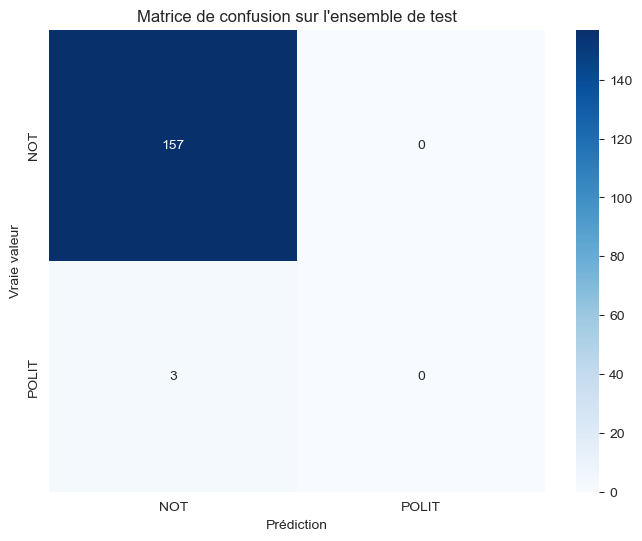

ValueError: y_true takes value in {'NOT', 'POLIT'} and pos_label is not specified: either make y_true take value in {0, 1} or {-1, 1} or pass pos_label explicitly.

In [149]:
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.naive_bayes import MultinomialNB
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve, auc, precision_recall_curve, average_precision_score
import matplotlib.pyplot as plt

class TextClassifier:
    def __init__(self, X_train, X_validation, X_test, y_train, y_validation, y_test, vectorizer):
        self.X_train = X_train
        self.X_validation = X_validation
        self.X_test = X_test
        self.y_train = y_train
        self.y_validation = y_validation
        self.y_test = y_test
        self.classifier = None
        self.preprocessor = preprocessor
        self.vectorizer = vectorizer  # Utilisez le vectorizer fourni en argument

    def train_classifier(self, X, y):
        # Définir les valeurs d'alpha que vous souhaitez essayer
        alphas = [0.1, 0.5, 1.0, 1.5, 2.0]

        # Créer une grille de recherche
        param_grid = {'alpha': alphas}
        grid_search = GridSearchCV(MultinomialNB(), param_grid, cv=5, scoring='accuracy')

        # Exécuter la recherche par grille sur les données d'entraînement
        grid_search.fit(X, y)

        # Obtenir le meilleur modèle après la recherche par grille
        best_classifier = grid_search.best_estimator_

        # Entraîner le modèle sur l'ensemble complet d'entraînement avec la meilleure valeur d'alpha
        best_classifier.fit(X, y)

        # Enregistrer le meilleur classificateur dans votre classe pour une utilisation ultérieure
        self.classifier = best_classifier
        print("best_classifier :", best_classifier)

        # Afficher la meilleure valeur d'alpha
        print(f"Meilleure valeur d'alpha : {grid_search.best_params_['alpha']}")

    def evaluate_classifier(self, X, y, set_name):
        if self.classifier is None:
            raise ValueError("Le classificateur n'a pas été entraîné. Utilisez train_classifier avant l'évaluation.")
        # Convertir les labels 'NOT' et 'POLIT' en 0 et 1
        y_binary = y.map({'NOT': 0, 'POLIT': 1})
        # Prédire les labels sur les données
        y_pred = self.classifier.predict(X)
        y_prob = self.classifier.predict_proba(X)[:, 1]

        # Afficher la courbe ROC
        fpr, tpr, _ = roc_curve(y_binary, y_prob)
        roc_auc = auc(fpr, tpr)

        # Évaluer la performance du modèle
        accuracy = accuracy_score(y, y_pred)
        print(f"Précision sur l'ensemble {set_name}: {accuracy:.4f}\n")

        # Afficher le rapport de classification
        print(f"Rapport de classification sur l'ensemble {set_name}:\n")
        print(classification_report(y, y_pred))

        # Afficher la matrice de confusion
        print(f"Matrice de confusion sur l'ensemble {set_name}:\n")
        print(confusion_matrix(y, y_pred))

        # Visualiser la matrice de confusion avec seaborn
        plt.figure(figsize=(8, 6))
        sns.heatmap(confusion_matrix(y, y_pred), annot=True, fmt='d', cmap='Blues', xticklabels=sorted(set(y)),
                    yticklabels=sorted(set(y)))
        plt.title(f"Matrice de confusion sur l'ensemble {set_name}")
        plt.xlabel('Prédiction')
        plt.ylabel('Vraie valeur')
        plt.show()

        # Afficher la courbe ROC
        fpr, tpr, _ = roc_curve(y, y_prob)
        roc_auc = auc(fpr, tpr)

        plt.figure(figsize=(8, 6))
        plt.plot(fpr, tpr, color='darkorange', lw=2, label='Courbe ROC (AUC = %0.2f)' % roc_auc)
        plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
        plt.xlabel('Taux de faux positifs')
        plt.ylabel('Taux de vrais positifs')
        plt.title(f'Courbe ROC sur l\'ensemble {set_name}')
        plt.legend(loc="lower right")
        plt.show()

        # Afficher la courbe Precision-Recall
        precision, recall, _ = precision_recall_curve(y_binary, y_prob)
        precision, recall, _ = precision_recall_curve(y, y_prob)
        average_precision = average_precision_score(y, y_prob)

        plt.figure(figsize=(8, 6))
        plt.step(recall, precision, color='b', alpha=0.2, where='post')
        plt.fill_between(recall, precision, step='post', alpha=0.2, color='b')
        plt.xlabel('Rappel')
        plt.ylabel('Précision')
        plt.ylim([0.0, 1.05])
        plt.xlim([0.0, 1.0])
        plt.title(f'Courbe Precision-Recall sur l\'ensemble {set_name} (AP = {average_precision:.2f})')
        plt.show()

    def grid_search(self, param_grid):
        if self.X_train is None or self.y_train is None:
            raise ValueError("Les données d'entraînement ne sont pas définies.")

        # Initialiser un classificateur Naive Bayes
        classifier = MultinomialNB()

        # Utiliser la recherche par grille pour trouver les meilleurs hyperparamètres
        grid_search = GridSearchCV(classifier, param_grid, cv=5, scoring='accuracy', verbose=1)
        grid_search.fit(self.X_train, self.y_train)

        # Afficher les meilleurs hyperparamètres
        print("Meilleurs hyperparamètres trouvés par la recherche par grille:")
        print(grid_search.best_params_)

        # Utiliser les meilleurs hyperparamètres pour entraîner le modèle
        best_classifier = grid_search.best_estimator_

        self.classifier = best_classifier

        return best_classifier


    def classify(self, tweet):
        if self.classifier is None:
            raise ValueError("Le classificateur n'a pas été entraîné. Utilisez train_classifier avant la classification.")

        # Utilisez le modèle pour classer le tweet
        tweet = self.preprocessor.clean_tweet(tweet)
        tweet = self.preprocessor.tokenize_text(tweet)
        tweet = self.preprocessor.lemmatize_text(tweet)
        preprocessed_tweet = ' '.join(tweet)
        preprocessed_tweet = str(preprocessed_tweet).lower()

        tweet_tfidf = self.vectorizer.transform([preprocessed_tweet])
        prediction = self.classifier.predict(tweet_tfidf)

        # Retournez le résultat de la classification
        return prediction[0]


# Utilisation de la classe TextClassifier pour entraîner le modèle
classifier = TextClassifier(X_train_tfidf, X_val, X_test_tfidf, y_train, y_val, y_test, representation.vectorizer)
classifier.train_classifier(X_train, y_train)

# Évaluer le classificateur sur l'ensemble de test
classifier.evaluate_classifier(X_test, y_test, "de test")

# Classer un tweet
tweet = "RT @Musiccitygal: Going into #tcot is like going into a Haunted House but SCARIER!!!//No joke, that. Funnier too!"
classification_result = classifier.classify(tweet)

print(f"Classification du tweet : {classification_result}")
